Machine Learning

Implementing a perceptron learning algorithm in Python

In [131]:
import numpy as np

class Perceptron(object):
    def __init__(self, eta=0.01,n_iter=10):
        self.eta=eta
        self.n_iter=n_iter
        
    def fit(self, X,y):
        self.w_=np.zeros(1+X.shape[1])
        self.errors_=[]
        
        for _ in range(self.n_iter):
            errors=0
            for xi, target in zip(X,y):
                update=self.eta*(target-self.predict(xi))
                self.w_[1:]+=update*xi
                self.w_[0]+=update
                errors+=int(update !=0.0)
            self.errors_.append(errors)
        return self 
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >=0.0, 1, -1)

Implementing the perceptron using the Iris dataset

In [62]:
import pandas as pd

#You can download the data from the online repository as such:

# df = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/iris/iris.data', header=None, encoding='utf-8')
# df.tail()

#Or simply get the data from your local machine as follows:

#df = pd.read_csv(r'iris.csv') #with header
df = pd.read_csv(r'iris.csv', header=None) #Without a header
df.tail()

,0,1,2,3,4
146,6.7,3,5.2,2.3,Virginica
147,6.3,2.5,5,1.9,Virginica
148,6.5,3,5.2,2,Virginica
149,6.2,3.4,5.4,2.3,Virginica
150,5.9,3,5.1,1.8,Virginica


Train the perceptron algorithm

In [134]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.
     Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

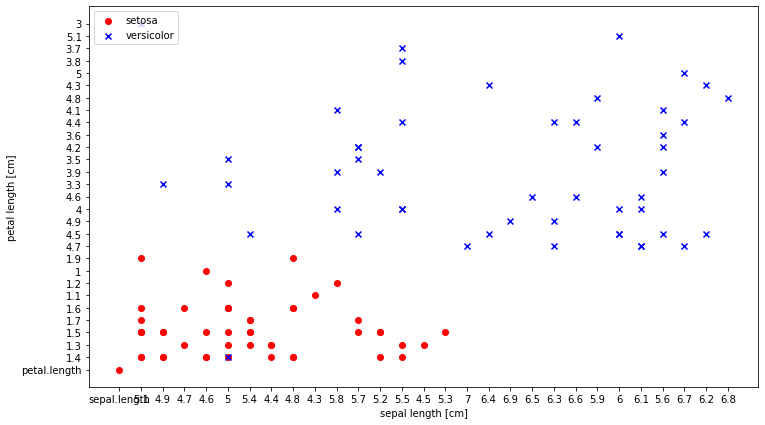

In [139]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.figure(figsize=(12,7))
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [140]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

TypeError: can't multiply sequence by non-int of type 'float'

In [141]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [142]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [175]:
np.random.seed(42)

In [176]:
def stepfunction(t):
    if(t>=0):
        return 1
    return 0

In [177]:
def prediction(X,W,b):
    return stepfunction((np.matmul(X,W)+b)[0])

In [178]:
def perceptronStep(X,y,W,b,learn_rate=0.01):
    for i in range(len(X)):
        y_pred=prediction(X[i],W,b)
        if(y[i]-y_pred==1):
            W[0]+=X[i][0]*learn_rate
            W[1]+=X[i][1]*learn_rate
            b+= learn_rate
        elif(y[i]-y_pred==-1):
            W[0]-=X[i][0]*learn_rate
            W[1]-=X[i][1]*learn_rate
            b-=learn_rate
            
    return W,b
            
        

In [179]:
def trainPerceptronAlgo(X,y,learn_rate=0.01, num_epochs=25):
    x_max=max(X.T[0])
    W=np.array(np.random.rand(2,1))
    b=np.random.rand(1)[0]+x_max
    
    boundary_lines=[]
    
    for i in range(num_epochs):
        W,b=perceptronStep(X,y,W,b,learn_rate)
        boundary_lines.append((-W[0]/W[1],-b/W[1]))
        
    return boundary_lines

In [180]:
data = df

In [181]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

In [182]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


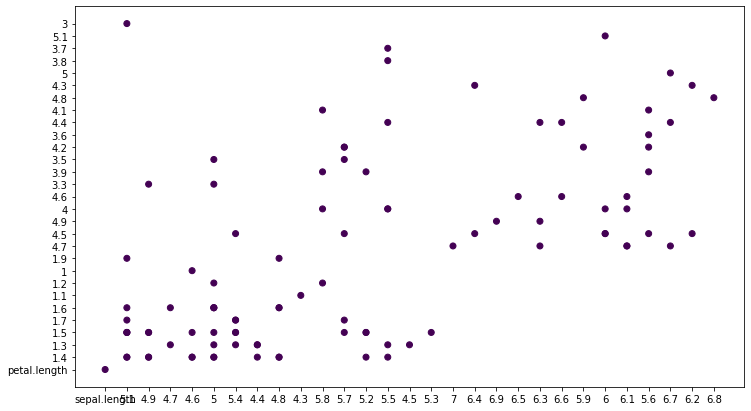

In [183]:
plt.figure(figsize=(12,7))
plt.scatter(X[:,0],X[:,1], c=y)

In [185]:
result = trainPerceptronAlgo(X,y)

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')